In [50]:
#https://www.youtube.com/watch?v=e8Yw4alG16Q
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=[10,6]
import warnings
warnings.filterwarnings("default")


In [10]:
url = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'
df= pd.read_csv(url,error_bad_lines=False)

In [44]:
df.tail()

,Month,#Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [46]:
df['Month']=pd.to_datetime(df['Month'],format='%Y%m%d') 
idf=df.set_index(['Month'])
idf.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


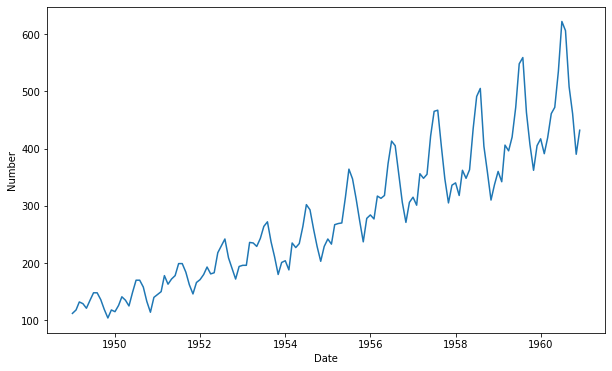

In [49]:
#plot
plt.xlabel("Date")
plt.ylabel("Number")
plt.plot(idf)

In [55]:
rolmean=idf.rolling(window=12).mean()
rolstd=idf.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


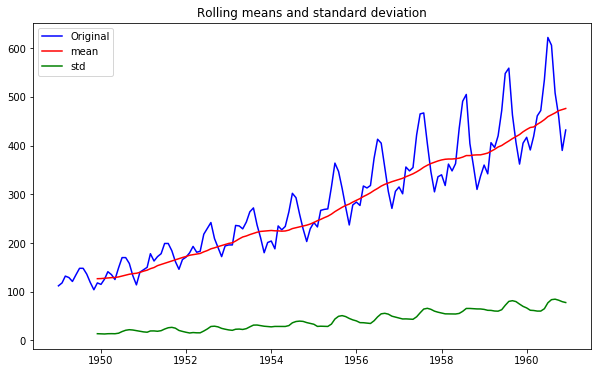

In [58]:
orig=plt.plot(idf,color='blue', label="Original")
mean=plt.plot(rolmean,color='red', label="mean")
std=plt.plot(rolstd,color='green', label="std")
plt.legend(loc='best')
plt.title('Rolling means and standard deviation')
plt.show(block=False)

In [61]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller Test:')
dftest=adfuller(idf['#Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','#lags used','Number of observations used'])

for key, value in dftest[4].items():
    dfoutput['critical value(%s)'%key]=value
    
print(dfoutput)


Results of Dickey Fuller Test:
Test Stat                        0.815369
p-value                          0.991880
#lags used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
critical value(10%)             -2.578770
dtype: float64


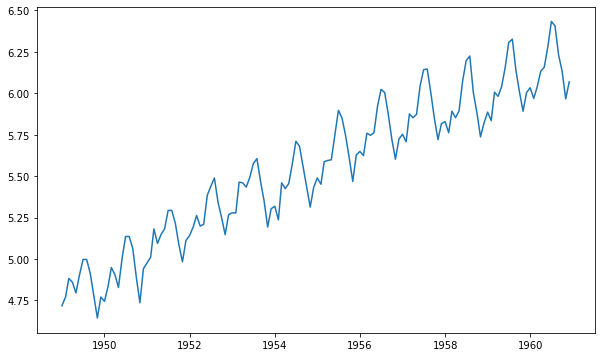

In [62]:
idf_logscale=np.log(idf)
plt.plot(idf_logscale)

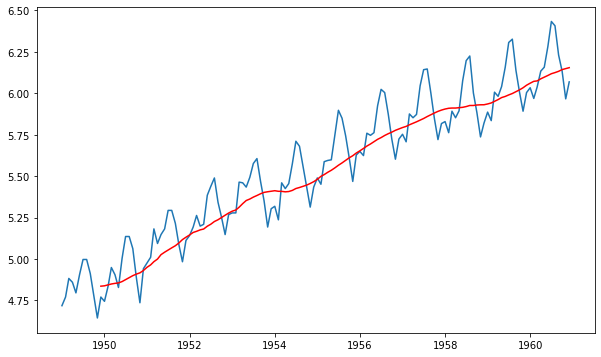

In [64]:
movingaverage=idf_logscale.rolling(window=12).mean()
movingSTD=idf_logscale.rolling(window=12).std()
plt.plot(idf_logscale)
plt.plot(movingaverage, color='red')


In [65]:
diff=idf_logscale-movingaverage
diff.head()

diff.dropna(inplace=True)
diff.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [68]:
def stattest(timeseries):
    #determing rolling statistics
    movingaverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries,color='blue', label="Original")
    mean=plt.plot(movingaverage,color='red', label="mean")
    std=plt.plot(movingSTD,color='green', label="std")
    plt.legend(loc='best')
    plt.title('Rolling means and standard deviation')
    plt.show(block=False)

    #perform dickey-fuller test:
    print('Results of Dickey Fuller Test:')
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')

    dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','#lags used','Number of observations used'])

    for key, value in dftest[4].items():
        dfoutput['critical value(%s)'%key]=value

    print(dfoutput)


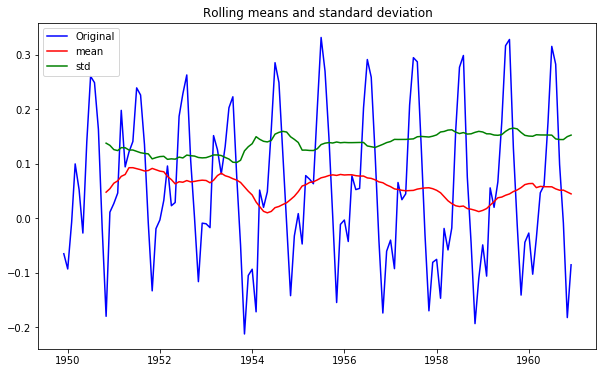

Results of Dickey Fuller Test:
Test Stat                       -3.162908
p-value                          0.022235
#lags used                      13.000000
Number of observations used    119.000000
critical value(1%)              -3.486535
critical value(5%)              -2.886151
critical value(10%)             -2.579896
dtype: float64


In [69]:
stattest(diff)

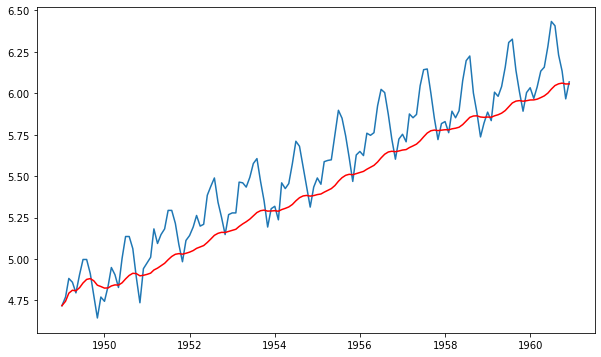

In [71]:
expdecayweightedavg=idf_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(idf_logscale)
plt.plot(expdecayweightedavg,color='red')

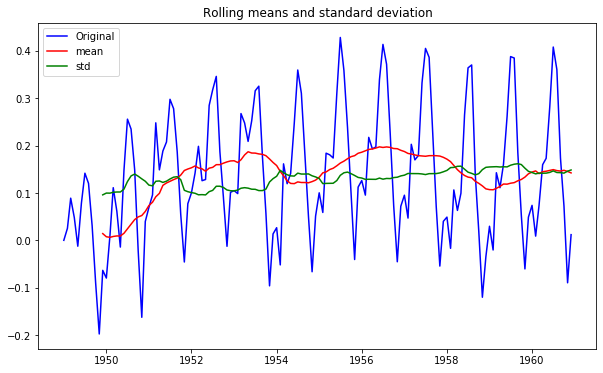

Results of Dickey Fuller Test:
Test Stat                       -3.601262
p-value                          0.005737
#lags used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
critical value(10%)             -2.578770
dtype: float64


In [72]:
difexp=idf_logscale-expdecayweightedavg
stattest(difexp)

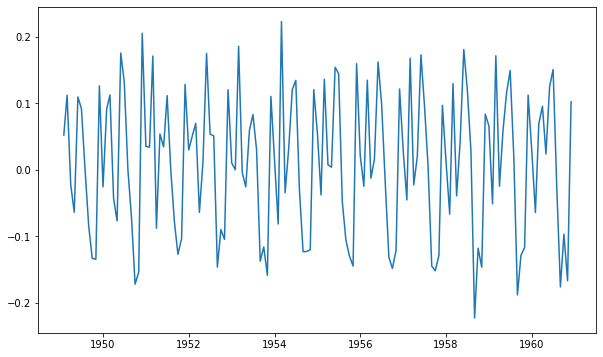

In [73]:
dflogshift=idf_logscale-idf_logscale.shift()
plt.plot(dflogshift)

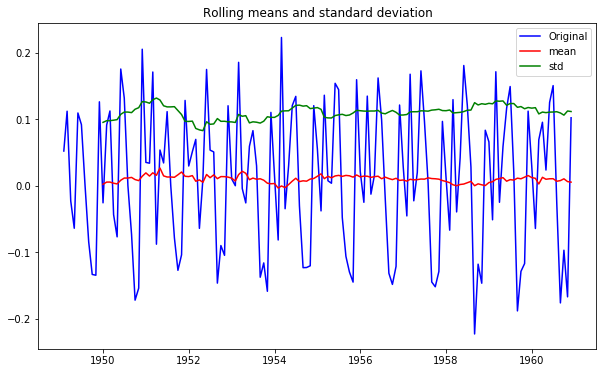

Results of Dickey Fuller Test:
Test Stat                       -2.717131
p-value                          0.071121
#lags used                      14.000000
Number of observations used    128.000000
critical value(1%)              -3.482501
critical value(5%)              -2.884398
critical value(10%)             -2.578960
dtype: float64


In [74]:
dflogshift.dropna(inplace=True)
stattest(dflogshift)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


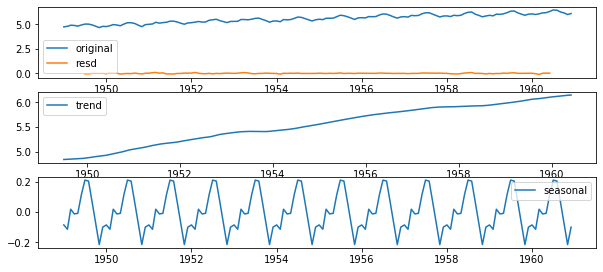

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
de=seasonal_decompose(idf_logscale)

trend=de.trend
seasonal=de.seasonal
residual=de.resid

plt.subplot(411)
plt.plot(idf_logscale, label="original")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label="trend")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label="seasonal")
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label="resd")
plt.legend(loc='best')


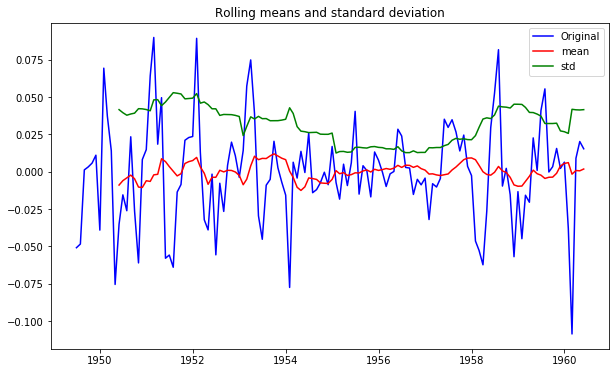

Results of Dickey Fuller Test:
Test Stat                     -6.332387e+00
p-value                        2.885059e-08
#lags used                     9.000000e+00
Number of observations used    1.220000e+02
critical value(1%)            -3.485122e+00
critical value(5%)            -2.885538e+00
critical value(10%)           -2.579569e+00
dtype: float64


In [78]:
delog=residual
delog.dropna(inplace=True)
stattest(delog)

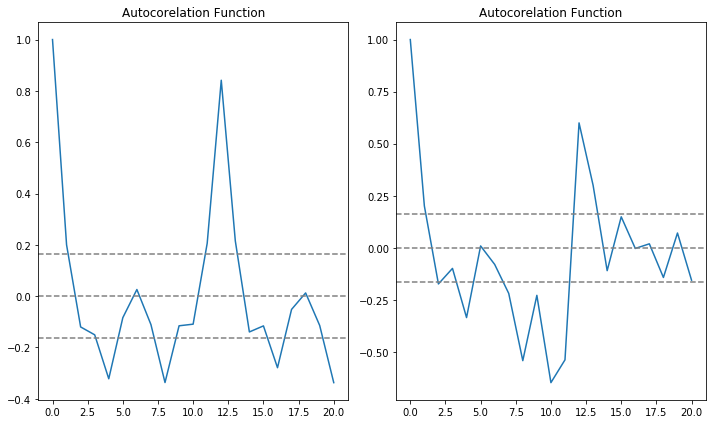

In [81]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(dflogshift,nlags=20)

lag_pacf=pacf(dflogshift,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dflogshift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dflogshift)),linestyle='--',color='gray')
plt.title('Autocorelation Function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dflogshift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dflogshift)),linestyle='--',color='gray')
plt.title('Autocorelation Function')
plt.tight_layout()




plotting AR Model


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


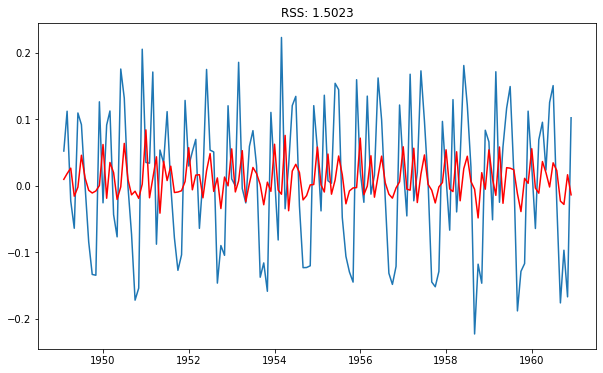

In [96]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(idf_logscale,order=(2,1,0))

results_AR=model.fit(disp=-1)
plt.plot(dflogshift)
plt.plot(results_AR.fittedvalues,color='red')
        
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dflogshift['#Passengers'])**2))
print('plotting AR Model')

plotting AR Model


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


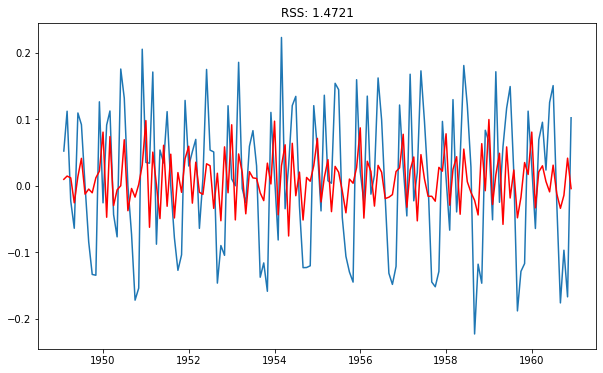

In [97]:
model=ARIMA(idf_logscale,order=(0,1,2))

results_MA=model.fit(disp=-1)
plt.plot(dflogshift)
plt.plot(results_MA.fittedvalues,color='red')
        
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dflogshift['#Passengers'])**2))
print('plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR Model


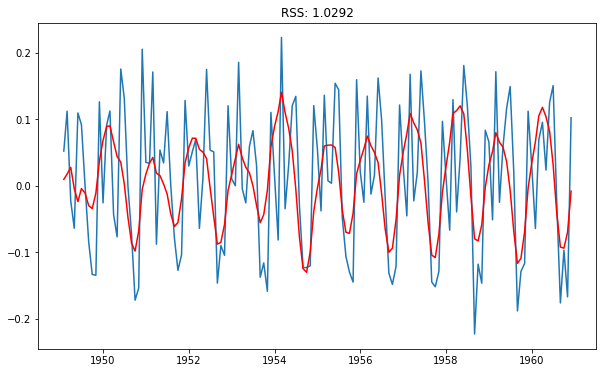

In [95]:
model=ARIMA(idf_logscale,order=(2,1,2))

results_Arima=model.fit(disp=-1)
plt.plot(dflogshift)
plt.plot(results_Arima.fittedvalues,color='red')
        
plt.title('RSS: %.4f'% sum((results_Arima.fittedvalues-dflogshift['#Passengers'])**2))
print('plotting AR Model')

In [101]:
pred_arima_diff=pd.Series(results_Arima.fittedvalues,copy=True)
print(pred_arima_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [104]:
#convert to cum sum
predcumsum=pred_arima_diff.cumsum()
predcumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [105]:
pred_arima_log=pd.Series(idf_logscale['#Passengers'].ix[0],index=idf_logscale.index)
pred_arima_log=pred_arima_log.add(predcumsum,fill_value=0)
pred_arima_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

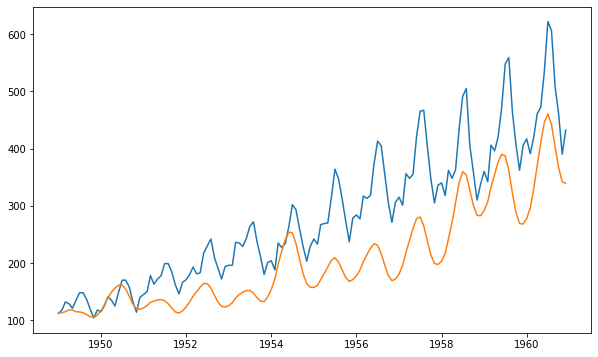

In [106]:
pred=np.exp(pred_arima_log)
plt.plot(idf)
plt.plot(pred)

In [109]:
idf_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


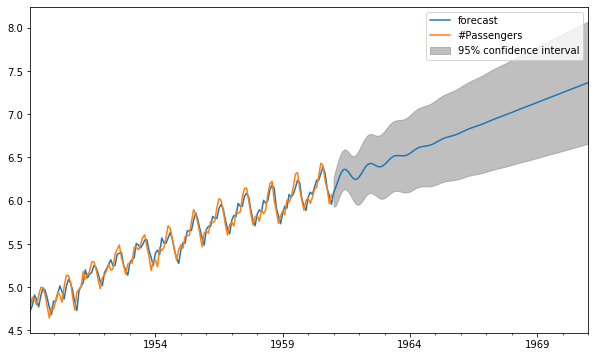

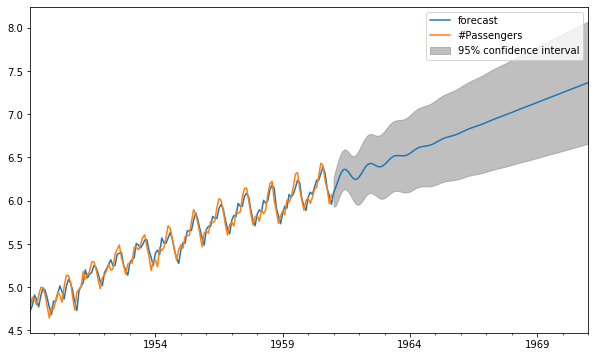

In [111]:
results_Arima.plot_predict(1,264)
#x=results_Arima.forecast(steps=120)

In [113]:
x=results_Arima.forecast(steps=120)
x

(array([6.09553393, 6.15281402, 6.22442963, 6.29241097, 6.34164711,
        6.36359356, 6.35784681, 6.33139301, 6.29597539, 6.26447713,
        6.24738325, 6.25025169, 6.27275832, 6.30940306, 6.35151485,
        6.38988647, 6.41727373, 6.43011047, 6.42906684, 6.41842485,
        6.40456152, 6.39403612, 6.39183078, 6.40019497, 6.41833685,
        6.44295399, 6.46937426, 6.49293977, 6.5102411 , 6.51989026,
        6.52267572, 6.52112381, 6.51864521, 6.51853683, 6.52311915,
        6.53322352, 6.5481286 , 6.56591547, 6.58410299, 6.6003653 ,
        6.61313257, 6.62192772, 6.6273778 , 6.6309312 , 6.6343868 ,
        6.63937976, 6.64696495, 6.65739831, 6.67015314, 6.6841424 ,
        6.69806615, 6.7107789 , 6.72157721, 6.73033973, 6.737498  ,
        6.74386368, 6.75037312, 6.75782581, 6.76668671, 6.77699811,
        6.78841307, 6.80032841, 6.81207182, 6.82308747, 6.83307123,
        6.8420248 , 6.850223  , 6.85811208, 6.86617327, 6.87479138,
        6.88416289, 6.8942637 , 6.90487876, 6.91

In [22]:












#a